# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [1]:
### BEGIN YOUR CODE

Student_ID = 18

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [2]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Forest Fires' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/162/forest+fires


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [2]:
### BEGIN YOUR CODE

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [6]:
### BEGIN YOUR CODE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
# !unzip ...
# !tar ...
# !gunzip ...
dataset = pd.read_csv("forestfires.csv")

### END YOUR CODE

--2025-05-17 09:59:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘forestfires.csv’

forestfires.csv         [ <=>                ]  24.88K  --.-KB/s    in 0.05s   

2025-05-17 09:59:39 (516 KB/s) - ‘forestfires.csv’ saved [25478]



####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [7]:
### BEGIN YOUR CODE

# 1. Размер файла
file_path = "forestfires.csv"
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 * 1024)
print("Размер датасета (МБ): {:.4f}".format(file_size_mb))

# 2. Размерность датасета
rows, cols = dataset.shape
print("Количество записей (объектов):", rows)
print("Общее количество столбцов:", cols)

# 3. Кол-во фич (все, кроме целевой переменной area)
n_features = cols - 1
print("Количество признаков (фич):", n_features)

# 4. Категориальные признаки и пропущенные значения
print("\nИнформация о типах данных и пропущенных значениях:")
dataset.info()

# 5. Статистическое описание
print("\nОсновные статистические данные:")
print(dataset.describe)

### END YOUR CODE

Размер датасета (МБ): 0.0243
Количество записей (объектов): 517
Общее количество столбцов: 13
Количество признаков (фич): 12

Информация о типах данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB

Основные статистические данные:
<bound method NDFrame.describe of      X  Y month  day  FFMC    DMC

**Здесь должен быть ваш текст**
Размер датасета составляет 263 килобайт, что соответствует 0,0263 мегабайтам. В датасете содержится 517 записей, 12 фич, 2 категориальных признака (день и месяц), нет пропущенных значений. Так же в датасете содержится столбец с ответами area показывающий площадь сгоревшего леса. Модель может решать задачу о предсказании по погодным условиям, дню недели и индексу пожарной опасности величину пожара(площадь).

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

Пропущенные значения:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


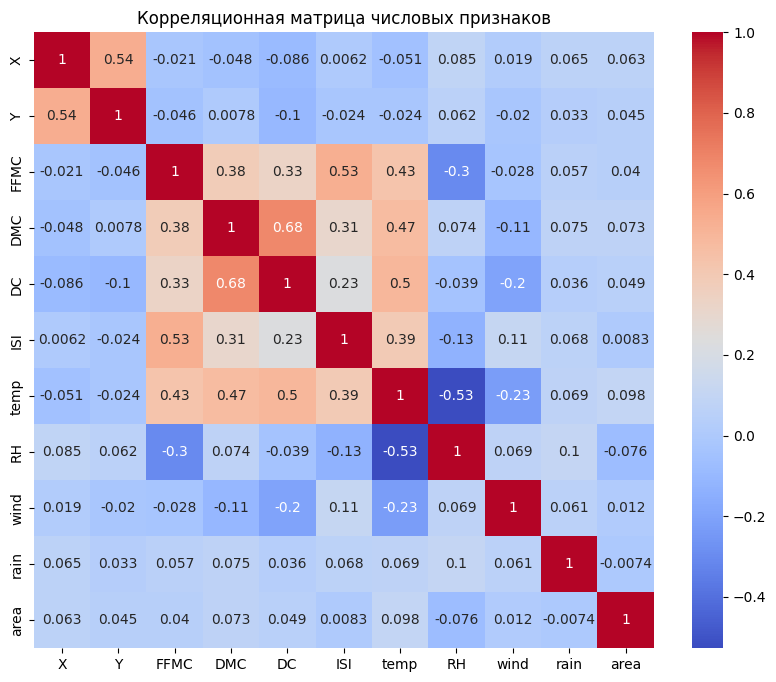

Размер обработанной обучающей выборки: (413, 29)
Размер обработанной тестовой выборки: (104, 29)


In [8]:
### BEGIN YOUR CODE

print("Пропущенные значения:")
print(dataset.isnull().sum())

# Корреляционная матрица
correlation_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.show()

# 2. Разделение на X и y
X = dataset.drop("area", axis=1)
y = dataset["area"]

# 3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обработка признаков
categorical_features = ["month", "day"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# Пайплайн для числовых признаков
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Пайплайн для категориальных признаков
categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Общий препроцессор
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Применение пайплайна
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Размер обработанной обучающей выборки:", X_train_prepared.shape)
print("Размер обработанной тестовой выборки:", X_test_prepared.shape)

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [9]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.001  # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        m = X_train.shape[0]  # количество объектов
        for i in range(iters):
            predictions = X_train @ theta
            error = predictions - y_train
            gradient = (2 / m) * X_train.T @ error #Градиент MSE функции
            theta -= alpha * gradient
            cost = np.mean(error ** 2)
        self.theta = theta
        self.cost = cost
        return theta, cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        m = X_train.shape[0]
        X_b = np.c_[np.ones((m, 1)), X_train]  # добавляем столбец x0 = 1
        y_train = y_train.reshape(-1, 1)       # делаем y вектор-столбцом
        n = X_b.shape[1]
        self.theta = np.zeros((n, 1))          # инициализация коэф. нулями
        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        m = X_train.shape[0]
        X_b = np.c_[np.ones((m, 1)), X_train]
        y_train = y_train.reshape(-1, 1)
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
        predictions = X_b @ self.theta
        error = predictions - y_train
        self.cost = np.mean(error ** 2)
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        m = X_test.shape[0]
        X_b = np.c_[np.ones((m, 1)), X_test]
        y_predict = X_b @ self.theta
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"


X = dataset.drop("area", axis=1)
y = dataset["area"].values

categorical_features = ["month", "day"]
numerical_features = [col for col in X.columns if col not in categorical_features]

X_num = X[numerical_features].values.astype(float)
mean_X = np.mean(X_num, axis=0)
std_X = np.std(X_num, axis=0)
X_num_scaled = (X_num - mean_X) / std_X

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X[categorical_features])

X_full_scaled = np.hstack((X_num_scaled, X_cat_encoded))

my_model = LinearRegressionModel() #экз. модели
cost_after_training = my_model.fit_with_GD(X_full_scaled, y, iters=1000)
print("Финальное значение функции стоимости (MSE):", cost_after_training)
print(my_model)

Финальное значение функции стоимости (MSE): 3936.1482023178587
Вектор параметров: [[ 8.53430136e+00]
 [ 3.41769109e+00]
 [ 1.58562791e+00]
 [ 8.87161442e-02]
 [ 2.88417613e+00]
 [-9.65824922e-02]
 [-1.71484881e+00]
 [ 3.52158441e+00]
 [-3.25362437e+00]
 [ 2.12071599e+00]
 [-6.75331544e-01]
 [ 2.36954727e-01]
 [ 1.54098726e+00]
 [ 3.82015186e-01]
 [ 5.56010794e-01]
 [ 8.89164428e-02]
 [ 6.21091105e-01]
 [-1.49470188e-01]
 [ 1.79755335e-01]
 [ 1.45938163e-01]
 [-1.12948790e-02]
 [ 1.02821214e-03]
 [ 4.94236920e+00]
 [-5.84988838e-01]
 [ 6.76535419e-01]
 [ 4.81824841e+00]
 [ 8.57025278e-01]
 [ 1.40264599e+00]
 [ 1.06929702e+00]
 [ 2.95538073e-01]]


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

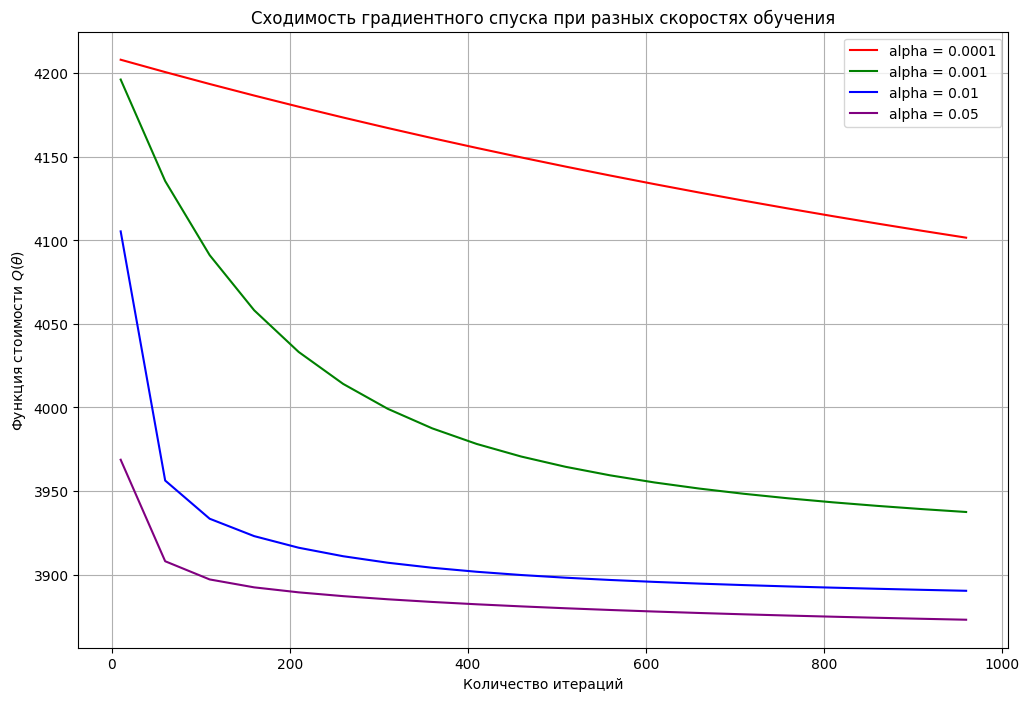

In [11]:
# Диапазон итераций
iteration_range = list(range(10, 1001, 50))  # от 10 до 1000 с шагом 50
learning_rates = [0.0001, 0.001, 0.01, 0.05]  # скорости обучения
colors = ['r', 'g', 'b', 'purple']

plt.figure(figsize=(12, 8))

for alpha, color in zip(learning_rates, colors):
    costs = []
    for iters in iteration_range:
        model = LinearRegressionModel()
        model.alpha = alpha
        cost = model.fit_with_GD(X_full_scaled, y, iters)
        costs.append(cost)
    plt.plot(iteration_range, costs, label=f"alpha = {alpha}", color=color)

plt.xlabel('Количество итераций')
plt.ylabel(r'Функция стоимости $Q(\theta)$')
plt.title('Сходимость градиентного спуска при разных скоростях обучения')
plt.legend()
plt.grid(True)
plt.show()


*Наиболее подходящая скорость обучение alpha=0,05, т.к. при ней достигается наименьшее значение функции стоимости, она стабильно убывает и не колеблется и даже при увеличении итераций продолжается сходиться к минимуму.*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [51]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код
def fit_with_normal_equations(self, X_train, y_train):
    m = X_train.shape[0]
    X_b = np.c_[np.ones((m, 1)), X_train]
    y_train = y_train.reshape(-1, 1)           # reshape в столбец
    self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
    predictions = X_b @ self.theta
    error = predictions - y_train
    self.cost = np.mean(error ** 2)
    return self.cost

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

10078.846579285222
Вектор параметров: [[-9.25435937e+01]
 [ 9.06649977e+00]
 [-3.40533508e+00]
 [-3.49336483e+00]
 [ 7.12586102e-01]
 [ 5.62483933e+00]
 [-1.53911570e+00]
 [-3.09920289e+00]
 [ 5.84927912e-02]
 [-1.35237548e+00]
 [-2.43935885e+00]
 [ 2.61039062e+01]
 [ 4.56542969e+01]
 [ 1.33995078e+02]
 [-1.95910156e+01]
 [ 6.50067187e+01]
 [ 4.83854688e+01]
 [ 9.18411719e+01]
 [ 2.95107031e+01]
 [ 2.91526563e+01]
 [-1.11063281e+01]
 [ 6.06886719e+01]
 [ 4.01537500e+01]
 [-5.03650000e+01]
 [-8.51003125e+01]
 [ 1.63517187e+01]
 [ 1.52571875e+01]
 [-9.65906250e+00]
 [ 3.76726562e+01]
 [-4.59714063e+01]]


- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [58]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y, test_size=0.2, random_state=42)

# Ручной градиентный спуск
gd_model = LinearRegressionModel()
gd_model.fit_with_GD(X_train, y_train, iters=1000)
y_pred_gd = gd_model.predict(X_test)
rmse_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd))
print("Градиентный спуск:", rmse_gd)
# Нормальные уравнения (ручной)
ne_model = LinearRegressionModel()
ne_model.fit_with_normal_equations(X_train, y_train)
y_pred_ne = ne_model.predict(X_test)
rmse_ne = np.sqrt(mean_squared_error(y_test, y_pred_ne))
print("Нормальные уравнения:", rmse_ne)
# SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
print("SGDRegressor:", rmse_sgd)
# LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("LinearRegression", rmse_lr)
# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge:", rmse_ridge)
# Lasso (исправленное alpha)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso:", rmse_lasso)


Градиентный спуск: 108.38758602238907
Нормальные уравнения: 140.84107904370518
SGDRegressor: 108.1616300654362
LinearRegression 107.76675986653048
Ridge: 107.86754349919458
Lasso: 107.80355295480639


*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Наилучший результат показали модели LinearPrgression, Ridge и Lasso, худший результат показали нормальные уравнения. Для прогназирования целевой переменной лучше использовать одну из LinearPrgression, Ridge и Lasso. Данные подходят для линейного моделирования, но присутствуют сложности простых аналитических решений. Улучшить результат можно применяя методы отбора признаков, усреднения шумов и пробуя более сложные модели*


- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.